Christian Hansen  
Metis: Project Fletcher  
3/2/2017

In [ ]:
# !nohup mongod --dbpath /home/ubuntu/data/db/ &

## Finding Sentiment of Books

In [2]:
from labMTsimple.storyLab import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division, print_function
lang = 'english'
labMT,labMTvector,labMTwordList = emotionFileReader(stopval=0.0,lang=lang,returnVector=True)
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import pos_tag
from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers
from gutenberg.query import get_metadata

# !pip install nltk.corpura

In [3]:
def word_lists_func(book):
    words = book.split(' ')
    stopset = set(stopwords.words('english'))
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized = tokenizer.tokenize(book)
    word_seg_split = [w for w in tokenized if not w in stopset]
    return(word_seg_split)

In [8]:
def happiness_scores_book(text,language = 'english'):
    book = text
#     beginning = book.find('\n\n\n*** START OF THIS PROJECT GUTENBERG')
#     end = book.find('\n\n\n\n\n\n\n\nEnd of the Project')
#     seg_book = book[beginning:end]

    word_seg_split = word_lists_func(book)
                                                        
    N = len(word_seg_split)
    window = 10000
    resolution = 200                                            
    s = (N-window-1)/resolution
    s_list = [int(i*s) for i in range(resolution+1)]
    window_score = []                                        
    for i in s_list:
        window_words = word_seg_split[i:i+window]
        happiness_score = []
        
        for w in window_words:
            if w.lower() in labMT:
                score_values = labMT[w.lower()]
                score = float(score_values[1])
                happiness_score.append(score)  
        window_score.append(np.mean(happiness_score))
                                                        
    plt.plot(window_score)
    plt.title('Sentiment of window over the entire book')
    plt.xlabel('Windowed measurements')
    plt.ylabel('Sentiment')
    
    return(list(np.nan_to_num(window_score)),word_seg_split)

In [25]:
book_number = 18857
text = strip_headers(load_etext(book_number,'english')).strip()
text[0:1000]

"A JOURNEY TO THE CENTRE OF THE EARTH\n\nBy Jules Verne\n\n\n\n\n[Redactor's Note: Journey to the Centre of the Earth is number\nV002 in the Taves and Michaluk numbering of the works of Jules\nVerne. First published in England by Griffith and Farran, 1871,\nthis edition is not a translation at all but a complete re-write\nof the novel, with portions added and omitted, and names changed.\nThe most reprinted version, it is entered into Project Gutenberg\nfor reference purposes only. A better translation is _A Journey\ninto the Interior of the Earth_ translated by Rev. F. A. Malleson,\nalso available on Project Gutenberg.]\n\n\n\n\nTABLE OF CONTENTS\n\nCHAPTER 1 MY UNCLE MAKES A GREAT DISCOVERY\n\nCHAPTER 2 THE MYSTERIOUS PARCHMENT\n\nCHAPTER 3 AN ASTOUNDING DISCOVERY\n\nCHAPTER 4 WE START ON THE JOURNEY\n\nCHAPTER 5 FIRST LESSONS IN CLIMBING\n\nCHAPTER 6 OUR VOYAGE TO ICELAND\n\nCHAPTER 7 CONVERSATION AND DISCOVERY\n\nCHAPTER 8 THE EIDER-DOWN HUNTER--OFF AT LAST\n\nCHAPTER 9 OUR START--W

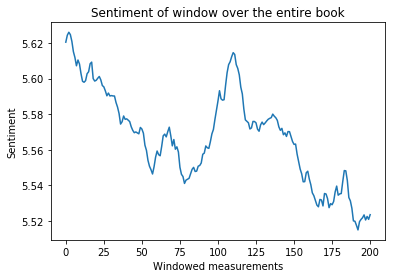

In [26]:
features,word_list= happiness_scores_book(text)

## Get adjective ratio

In [5]:
def get_adj_ratio(word_list):
    from collections import Counter
    import pandas as pd
    pos_tag_df = pd.DataFrame(nltk.pos_tag(word_list))
    adj_ratio_compare = pos_tag_df[pos_tag_df[1]=="JJR"].shape[0]/pos_tag_df.shape[0]
    adj_ratio_super = pos_tag_df[pos_tag_df[1]=="JJS"].shape[0]/pos_tag_df.shape[0]
    adj_ratio = pos_tag_df[pos_tag_df[1]=="JJ"].shape[0]/pos_tag_df.shape[0]
    #add up everything
    total_adj = adj_ratio+adj_ratio_compare+adj_ratio_super
    pos_tag_df = pd.DataFrame(nltk.pos_tag(word_list))
    return(total_adj,pos_tag_df)

## Determine narrative( I or You) of book

In [ ]:
# 1.	CC	Coordinating conjunction  
# 2.	CD	Cardinal number  
# 3.	DT	Determiner  
# 4.	EX	Existential there  
# 5.	FW	Foreign word  
# 6.	IN	Preposition or subordinating conjunction  
# 7.	JJ	Adjective  
# 8.	JJR	Adjective, comparative  
# 9.	JJS	Adjective, superlative  
# 10.	LS	List item marker  
# 11.	MD	Modal  
# 12.	NN	Noun, singular or mass  
# 13.	NNS	Noun, plural  
# 14.	NNP	Proper noun, singular  
# 15.	NNPS	Proper noun, plural  
# 16.	PDT	Predeterminer  
# 17.	POS	Possessive ending  
# 18.	PRP	Personal pronoun  
# 19.	PRP$	Possessive pronoun  
# 20.	RB	Adverb  
# 21.	RBR	Adverb, comparative    
# 22.	RBS	Adverb, superlative    
# 23.	RP	Particle    
# 24.	SYM	Symbol  
# 25.	TO	to  
# 26.	UH	Interjection  
# 27.	VB	Verb, base form  
# 28.	VBD	Verb, past tense  
# 29.	VBG	Verb, gerund or present participle  
# 30.	VBN	Verb, past participle  
# 31.	VBP	Verb, non-3rd person singular present  
# 32.	VBZ	Verb, 3rd person singular present  
# 33.	WDT	Wh-determiner  
# 34.	WP	Wh-pronoun  
# 35.	WP$	Possessive wh-pronoun  
# 36.	WRB	Wh-adverb  

In [ ]:
pos_tag_df = pd.DataFrame(nltk.pos_tag(word_list))

In [ ]:
pos_tag_df[pos_tag_df[1]=="NNP"][0].value_counts()[0:5]

In [ ]:
pos_tag_df[pos_tag_df[1]=="PRP"][0].value_counts()[0:5]

In [ ]:
pos_tag_df[pos_tag_df[1]=="PRP$"][0].value_counts()[0:5]

## Add values to mongod

In [6]:
def start_up_mongo():
    from pymongo import MongoClient
    client = MongoClient()
    db = client.books
    #books_db.drop()
    #db.books.delete_many({})
    #book_db.remove() #remove everything in book_db
    books_db = db.books
    print(books_db.count())
    return(books_db)

In [7]:
books_db = start_up_mongo()

1221


In [8]:
def load_useful_files():
    import pickle
    book_numbers = pickle.load( open( "book_numbers.pkl", "rb" ) )
    # Get list of book indexes, randomly...Save this to pickle
    #book_numbers = [np.random.randint(0,54000) for x in range(54000)]
    # with open('book_numbers.pkl','wb') as picklefile:
    #pickle.dump(book_numbers,picklefile)
    ## load metadata pickle file
    all_meta = pickle.load( open( "all_meta.p", "rb" ) )
    return(book_numbers,all_meta)

{'Adventure stories',
 'Earth (Planet) -- Core -- Fiction',
 'Fantasy fiction',
 'Science fiction'}

In [ ]:
# books_db.insert_one({'test':'val'})
# books_db.count

## Store information in Mongodb

In [ ]:
# subject in all_meta[bn]['subjects']

In [10]:
count = 0
#started at 0-2000
#next 2000 4000
#run3 4000:6000
def get_books_mongo(start,stop):
    for bn in book_numbers[start:stop]:
        language = 'en'
        subject = 'fiction'
        if (all_meta[bn]['language'][0] == language) and (subject in [w.lower() for w in " ".join(all_meta[bn]['subjects']).split(' ')]):
                try:
                    count+=1
                    features, word_list = happiness_scores_book(load_etext(bn,'english'))
                    title = all_meta[bn]['title']
                    total_adj,_ =get_adj_ratio(word_list)
                    author = all_meta[bn]['author']
                    subjects = list(all_meta[bn]['subjects'])
                    birth = all_meta[bn]['authoryearofbirth']
                    death = all_meta[bn]['authoryearofdeath']
                    book ={'index': bn,
                    'subject':subjects,
                    'text': word_list,
                    'birth':birth,
                    'death':death,
                    "name": author,
                    "title": title,
                    "sentiment_array": features,
                    'adj_ratio':total_adj 
                    }
                    books_db.insert_one(book)
                    print(count)
                    books_db.ensureIndex( { "index":bn }, { unique: True } )
                except:
                    print('exception')
        else:
            print('not happening')
        return(books_db)

In [11]:
#books_db.insert_one({'test'})

In [12]:
books_db.count()

1221

In [13]:
# get_books_into_mongo(0,6000)

In [14]:
#books_db.find_one({'index':book_numbers[2000]})['sentiment_array']

In [16]:
len(books_db.distinct('index'))

1036

In [27]:
def get_sentiment_array_back(books_db,index):
    sentiment_array = []
    for idx in index:
           sentiment_array.append( books_db.find_one({'index':idx})['sentiment_array'])
        
    return(sentiment_array)
#sentiment_array = np.array(sentiment_array)

In [28]:
sentiment_array = get_sentiment_array_back(books_db)

In [19]:
# db.collection.distinct(field, query, options)

Scale up and use as many books as possible and plot for each category...

## Preform SVD 

In [29]:
sentiment_df = pd.DataFrame(sentiment_array)
sentiment_df = sentiment_df.dropna(axis = 1)
sentiment_df.shape

(1221, 201)

In [107]:
def lsa_sentiment_vec(components,input_sentiment_array):
    
    from sklearn.decomposition import TruncatedSVD, NMF
    from sklearn.preprocessing import Normalizer
    sentiment_df = pd.DataFrame(input_sentiment_array)
    sentiment_df = sentiment_df.dropna(axis = 1)
    # Fit LSA. Use algorithm = “randomized” for large datasets 
    lsa = TruncatedSVD(components,algorithm = 'arpack')
    #lsa = NMF(10)
    #sentiment_df = pd.DataFrame(sentiment_array.T)
    dtm_lsa = lsa.fit_transform(sentiment_df)
    #dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
    #svd_vecs = pd.DataFrame(dtm_lsa.round(5),index =range(88),columns = range(20))
    plt.plot(range(len(lsa.explained_variance_ratio_)), lsa.explained_variance_ratio_, '.')
    plt.xlabel('Number of Decomposed Vectors')
    plt.ylabel('Variance Ratio')
    plt.title('Explained Variance Ratio')
    plt.show()
    return(lsa,dtm_lsa)



In [25]:
#similarity = np.asarray(np.asmatrix(dtm_lsa) * np.asmatrix(dtm_lsa).T) 
#texts_approx = pd.DataFrame(similarity)
#texts_approx.head()

In [120]:
def get_approx_book_matrix(dtm,lsa,slice_num,plot_book_index):
    svd_vecs = pd.DataFrame(np.dot(dtm_lsa,lsa.components_))

    dtm_lsa_slice = np.expand_dims(dtm_lsa[:,slice_num], axis=1).T
    ## this is the V
    
    lsa_slice = np.expand_dims(lsa.components_[slice_num,:],axis=1)
    ## This is the W, the weights
    ## books are rows, columns are modes
    
    svd_vecs_slice = pd.DataFrame(np.dot(lsa_slice, dtm_lsa_slice)).T
    plt.plot(sentiment_df.iloc[plot_book_index,:] - np.mean(sentiment_df.iloc[plot_book_index,:]),label = 'actual')
    plt.plot(svd_vecs_slice.iloc[plot_book_index,:] - np.mean(svd_vecs.iloc[plot_book_index,:]),label ='svd')
    plt.legend()
    return(svd_vecs)

# approx_matrix = get_approx_book_matrix(dtm_lsa, lsa, 2, 40)
# approx_matrix = approx_matrix
# approx_matrix.head()

In [32]:
approx_matrix.shape

(1221, 201)

In [28]:
# # np.argsort(-lsa.components_).shape
# # col_names(np.argsort(otherarray))
# dtm_lsa_slice = np.expand_dims(dtm_lsa[:,6], axis=1).T
# ## this is the V
# lsa_slice = np.expand_dims(lsa.components_[6,:],axis=1)
# ## This is the W, the weights
# ## books are rows, columns are modes
# svd_vecs_slice = pd.DataFrame(np.dot(lsa_slice, dtm_lsa_slice))
# print(svd_vecs_slice.shape)
# plt.plot(sentiment_df.iloc[40,:],label = 'actual')
# plt.plot(svd_vecs.iloc[40,:],label ='svd')
# plt.legend()
#np.dot(dtm_lsa,lsa.components_).round(2)
# plt.plot(np.array(sentiment_array)[1])
# plt.plot(texts_approx.iloc[1,:])

In [33]:
def cluster_sentiment(numb_of_cluster,array_to_fit):
    from sklearn.cluster import AgglomerativeClustering, KMeans ,ward_tree
    ##number of clusters to find...! Based on research paper...
    svd_vecs = array_to_fit
    n_clusters = numb_of_cluster
    model = AgglomerativeClustering(n_clusters=n_clusters,linkage="complete", affinity='cosine')
    #model = KMeans(n_clusters)
    model.fit(svd_vecs)
    svd_cat = model.labels_
    print('svd array:' ,svd_cat)
    print('length:',len(svd_cat))
    return(svd_cat)

svd array: [30 12 30 ..., 30 97 31]
length: 1221


In [34]:
def plot_book_svd(svd_cat,svd_vecs):
    svd_cats = list(set(svd_cat))
    for i in range(len(svd_cat)):
        books_db.update_one({'index':book_numbers[i]},{'$set': {'svd_cats': str(svd_cat[i])}})
    for i in range(len(svd_vecs)):
        books_db.update_one({'index':book_numbers[i]},{'$set': {'svd_array': list(svd_vecs.iloc[i,:])}})

    top_6_cats_svd = pd.Series(svd_cat).value_counts()[0:6].index
    all_arrays = []
    for c in top_6_cats_svd:
        plt.figure(figsize =(10,10))
        carrays = []
        for i in books_db.find({'svd_cats':str(c)}):
            carrays.append(i['svd_array']-np.mean(i['svd_array']))
            plt.plot(i['svd_array']-np.mean(i['svd_array']))
            plt.ylabel('svd_sentiment')
            plt.xlabel('observations')
            plt.title(str(c) +' Svd_ sentiment time series')
        all_arrays.append(carrays)
        
    return(np.array(all_arrays))

In [121]:
def plot_averages(svd_cat,input_array,k,lw):
    mean_array = []
    for i in range(len(input_array)):
        mean = np.mean(input_array.T[i],axis=0)
        plt.plot(mean,k,linewidth = lw)
        mean_array.append(mean)

    return np.array(mean_array).T

In [118]:
# all_arrays = plot_book_svd(svd_cat,approx_matrix)

In [37]:
# pd.Series(svd_cat).value_counts()[0:6].index

Int64Index([30, 12, 15, 34, 7, 13], dtype='int64')

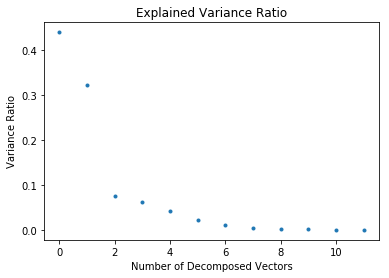

svd array: [30 12 30 ..., 30 97 31]
length: 1221


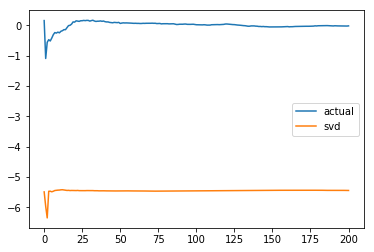

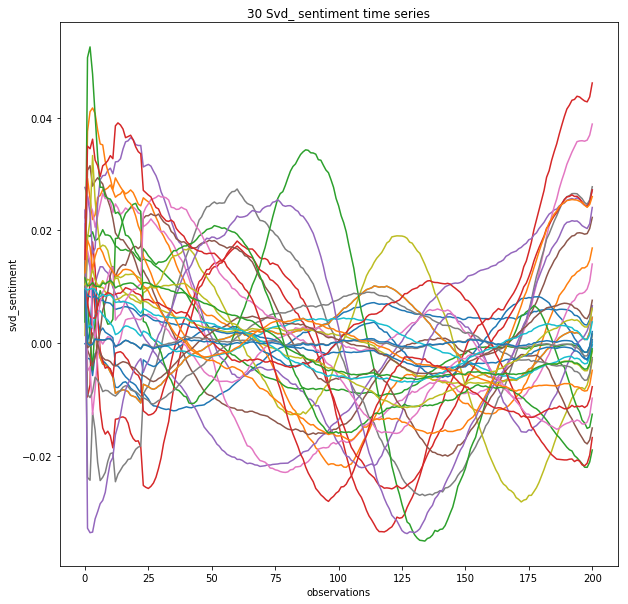

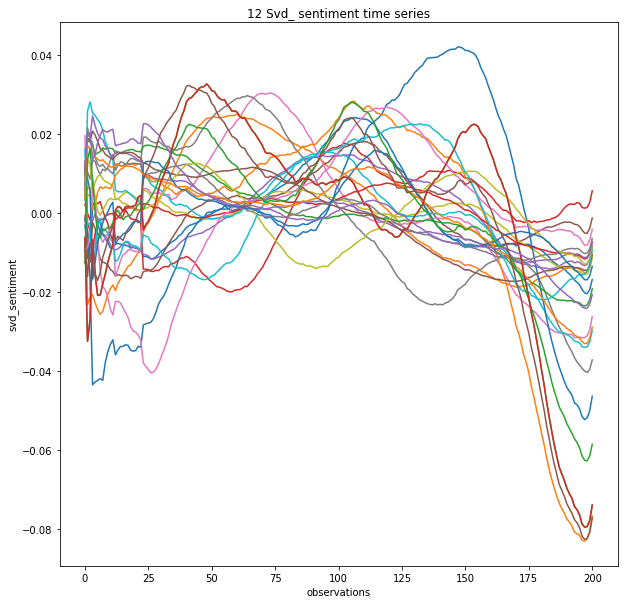

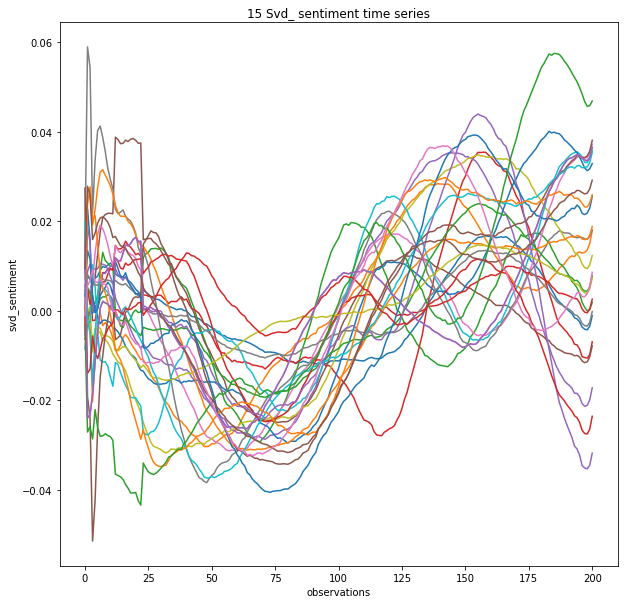

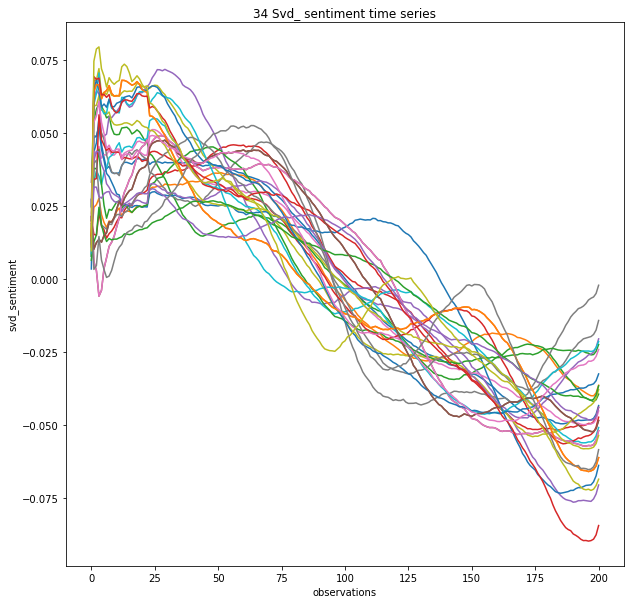

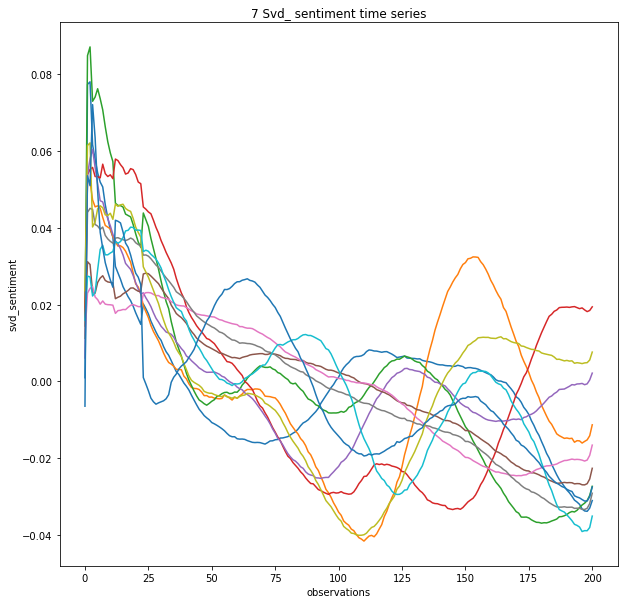

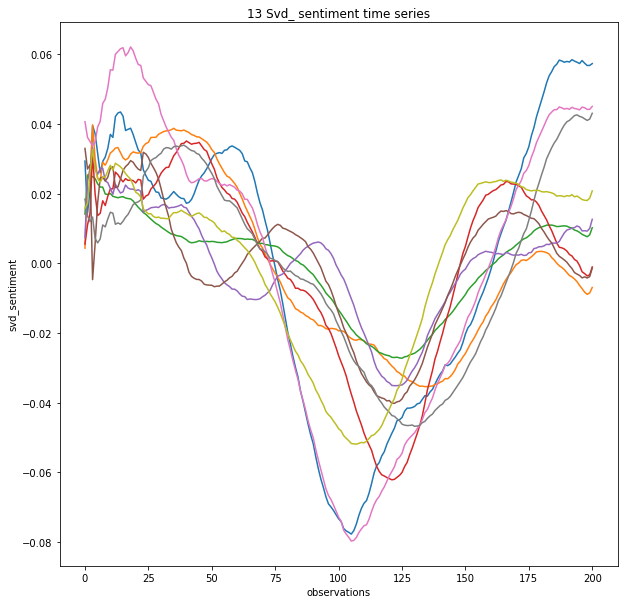

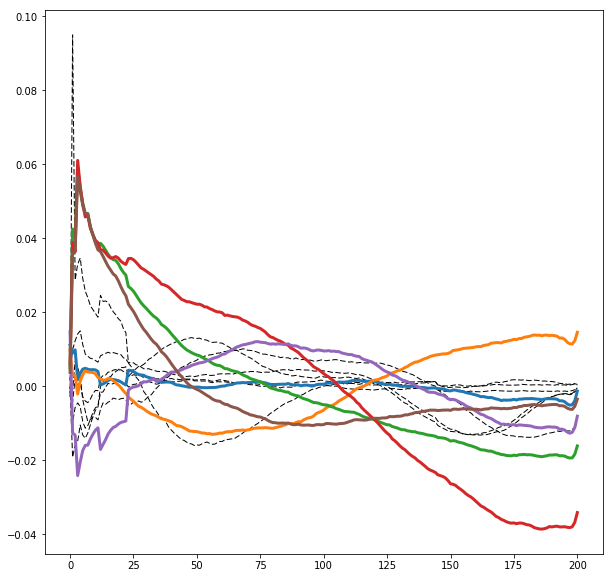

In [122]:
book_numbers,all_meta = load_useful_files()
sentiment_array = get_sentiment_array_back(books_db,index)
sentiment_df = pd.DataFrame(sentiment_array)
sentiment_df = sentiment_df.dropna(axis = 1)
sentiment_df.shape
lsa,dtm_lsa = lsa_sentiment_vec(12,sentiment_array)
approx_matrix = get_approx_book_matrix(dtm_lsa, lsa, 2, 40)
approx_matrix = approx_matrix
approx_matrix.head()
svd_cat = cluster_sentiment(100,approx_matrix)
approx_matrix.shape
all_arrays = plot_book_svd(svd_cat,approx_matrix)
plt.figure(figsize=(10,10))
# mean_array = plot_averages(svd_cat,all_arrays,'',3)
scramb_mean_array = plot_averages(cats_1,all_ar,'k--',1)
retest = plot_averages(cats,all_ars,'',3)

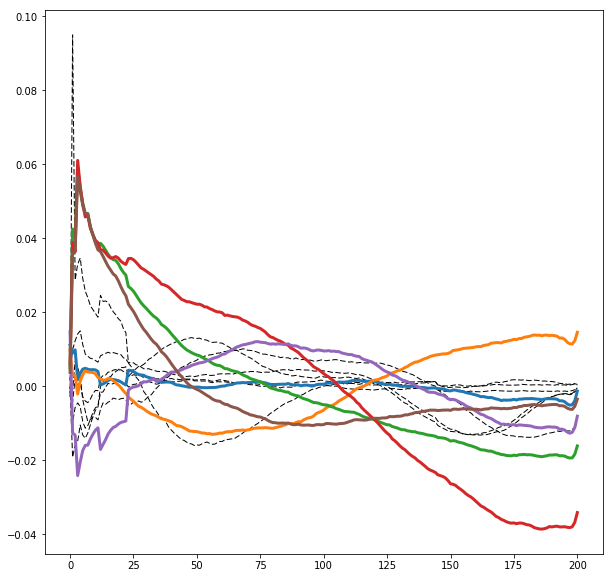

In [123]:
plt.figure(figsize=(10,10))
# mean_array = plot_averages(svd_cat,all_arrays,'',3)
scramb_mean_array = plot_averages(cats_1,all_ar,'k--',1)
retest = plot_averages(cats,all_ars,'',3)

In [41]:
mean_array = np.array(mean_array).T
mean_array.shape

(6, 201)

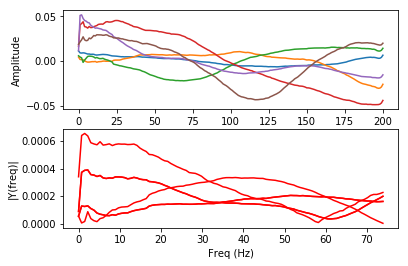

In [70]:
Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vect
ff = 5;   # frequency of the signal
y = np.array(mean_array).T

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range
Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(int(n/2))]

fig, ax = plt.subplots(2, 1)
ax[0].plot(y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

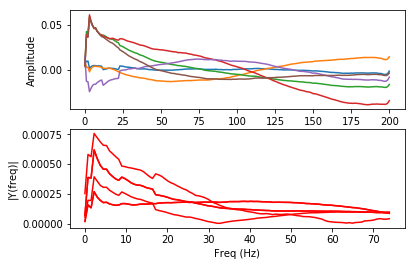

In [71]:
Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vect
ff = 5;   # frequency of the signal
y = np.array(scramb)

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range
Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(int(n/2))]
fig, ax = plt.subplots(2, 1)
ax[0].plot(y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

## Look at random book data...see pattern

In [72]:
def scramble_texts(word):
    foo = list(word)
    np.random.shuffle(foo)
    return ' '.join(foo)

In [73]:
scramb_text = scramble_texts(word_list)

NameError: name 'word_list' is not defined

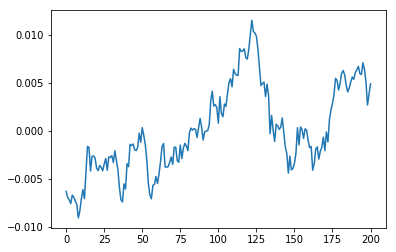

In [125]:
sentiment,wordlist = happiness_scores_book(scramb_text)

In [126]:
scramb_book[0:122]

NameError: name 'scramb_book' is not defined

In [76]:
def get_scrambled_books(thresh):
    #thresh must be an integer
    books_array = []
    counter = 0
    # order and index *shouldn't* be an issue.
    for i in books_db.find():

        if counter < int(thresh):
            try:
                scramb_book = scramble_texts(i['text'])
                features,_ = happiness_scores_book(scramb_book)
                books_array.append(features)
            except:
                pass
    
    # import pickle
    # with open('scramb_books.p','wb') as picklefile:
    #     pickle.dump(books_array,picklefile)
    
    
        return(books_array)

In [ ]:
import pickle
books_array = pickle.load( open( "scramb_books.p", "rb" ) )

svd array: [74 18 70 21 99 29  8 17 23 74 83 74 38 62 26 46 74 17 42 80 41 74 32 15 65
 20 15 90  3  8  3 74 17 14 19 55 19 48  1 10 91  8 71 19 87 29 21 48  9 21
 13 74  8 19 17 26 90 89 14 32  6 36 24 36 81 41 10  2 38 29 68 48 16 43  1
 11 81 48 23 30 18  0 48 20 24 36 21  9  8 44 38 74 74 18 45 36 20 34 22 13
 32  7 26  9  9 74 73 48  9 43 74  0 17 26 46 16 34  2 30 47 32 32 16 29 42
 37 35 81 16  4  3  9 15 36 19 20 13 44 17  3 17 31 20  9 17 31  2 18 85  9
 31 10  3 16 48 82  0 18 23 10 34 22 25 17  2 19 22  6 74 24 42 45 77 70  6
 26 16 46 67 26 31 70 74 48  2 79  0 50  3 95 42  0  6 21 57 17 32  2 49  1
 96 34 97 51  0 43 32 40 12 38 15  9 23 70 42  0  9 44 11 24 39 44 38 47 70
 21 15 16 18 42  4 17 81 51 41 29 42 20  6 10 18 23 53 36  7  0 74 46 70  2
 32 74  3 29 10  2  9  0  8 36  7 21 32 34 36 38 17 42  9  6 34 13  9 42  7
 20 30 16 53  6 45 74 51 39 43 16  2  9 21 18  2 17  1 46 37 81 46 46 70  0
  8 74  3  9 90  8  5  8 23 19  5 74 39 35 70 30 74 26 24 53 30 24 18 98 18
 

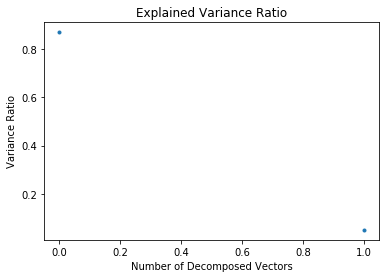

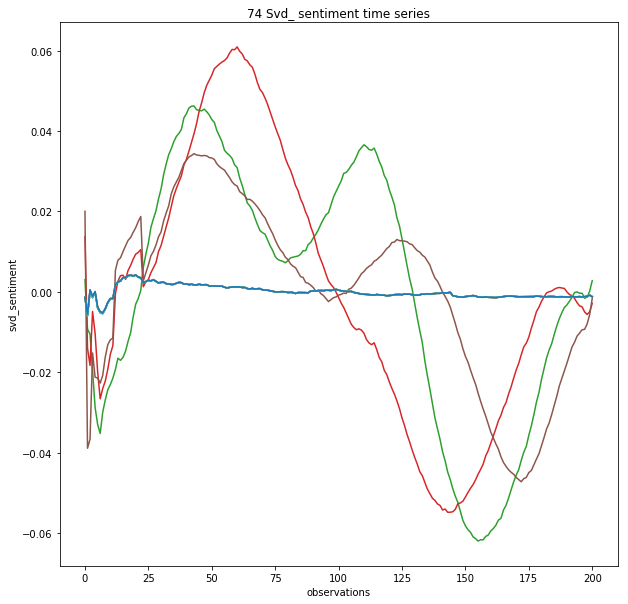

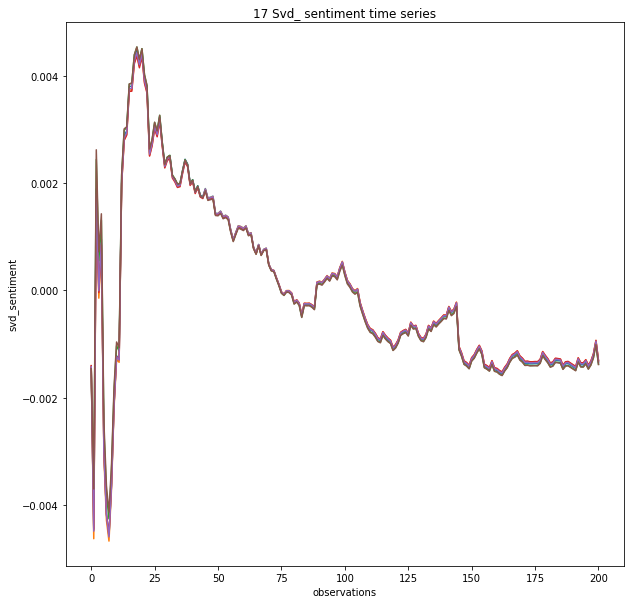

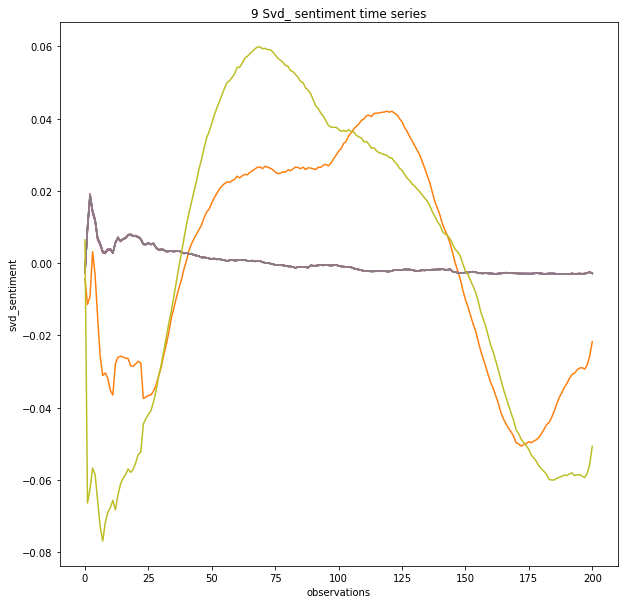

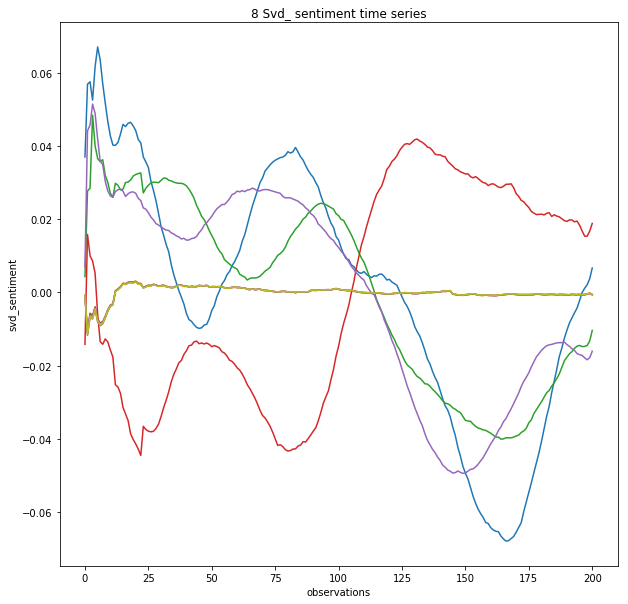

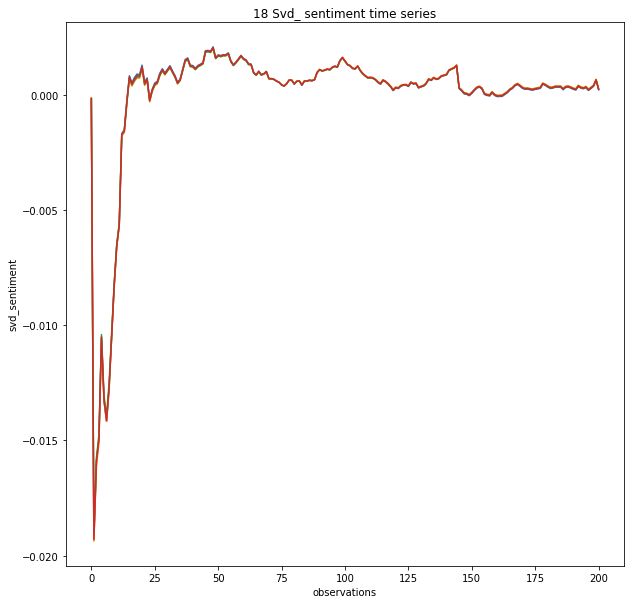

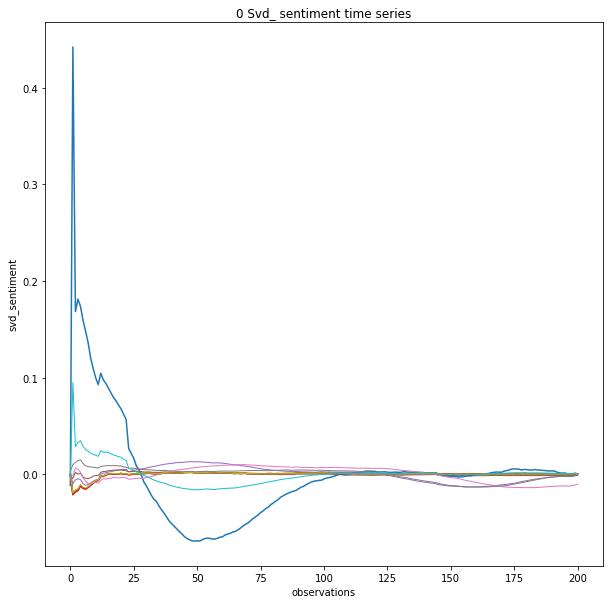

In [48]:
scramb_sent = pd.DataFrame(np.array(books_array))
s_lsa, s_dtm_lsa = lsa_sentiment_vec(2,scramb_sent)
approx_vecs = pd.DataFrame(np.dot(s_dtm_lsa,s_lsa.components_))
cats_1= cluster_sentiment(100,approx_vecs)
all_ar = plot_book_svd(cats_1,approx_vecs)
scramb = plot_averages(cats_1,all_ar,'-',1)

In [50]:
pd.Series(cats_1).value_counts()[0:6]

74    29
17    20
9     17
8     16
18    15
0     14
dtype: int64

## Get similarity between all books in values

In [ ]:
### comparing books to dante's inferno

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def cosine_sim(text1, text2):
    tfidf_vec = TfidfVectorizer(stop_words="english", 
                        token_pattern="\\b[a-zA-Z][a-zA-Z]+\\b")
    tfidf = tfidf_vec.fit_transform([str(text1), str(text2)])
    return ((tfidf * tfidf.T).A)[0,1]

In [ ]:
#text is dante's inferno...
#so I'm finding the similarity between dantes inferno and other text
text_temp =[]
for bn in book_numbers[0:10]:
    text_temp = strip_headers(load_etext(bn,'english'))
    print(cosine_sim(text,text_temp))

## Make Recommender System

In [20]:
# import sklearn metrics for distances, we will use the cosine similarity metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import euclidean_distances

In [241]:
index = []
len_text = []
adj_ratio = []
sentiments = []
title = []
text = []
for i in books_db.find():
    index.append(i['index'])
    len_text.append(len(i['text']))
    adj_ratio.append(i['adj_ratio'])
    sentiments.append(i['sentiment_array'])
    title.append(i['title'])
    text.append(" ".join(i['text']))

In [242]:
downloads = [all_meta[index[i]]['downloads'] for i in range(len(index))] 
subjects = []
for bn in index:
    subjects.append([[w.lower() for w in " ".join(all_meta[bn]['subjects']).split(' ')]])

In [243]:
text_df = pd.DataFrame({'text':text},index=index)
text_df.head()

,text
29466,The Project Gutenberg EBook Lords Stratosphere...
25827,The Project Gutenberg EBook Leslie Ross Charle...
7298,The Project Gutenberg EBook William Tell Told ...
5471,The Project Gutenberg EBook Joshua Georg Ebers...
41627,The Project Gutenberg EBook Futuria Fantasia W...


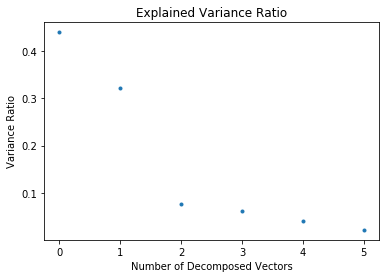

svd array: [15 70 92 ..., 92 24 77]
length: 1221


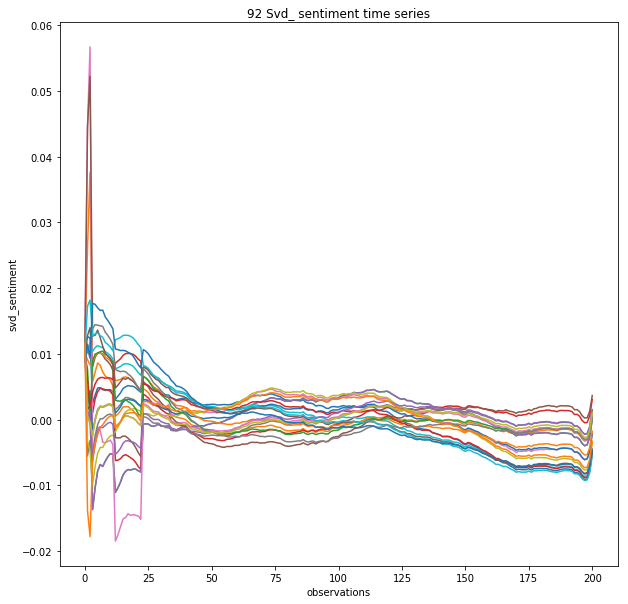

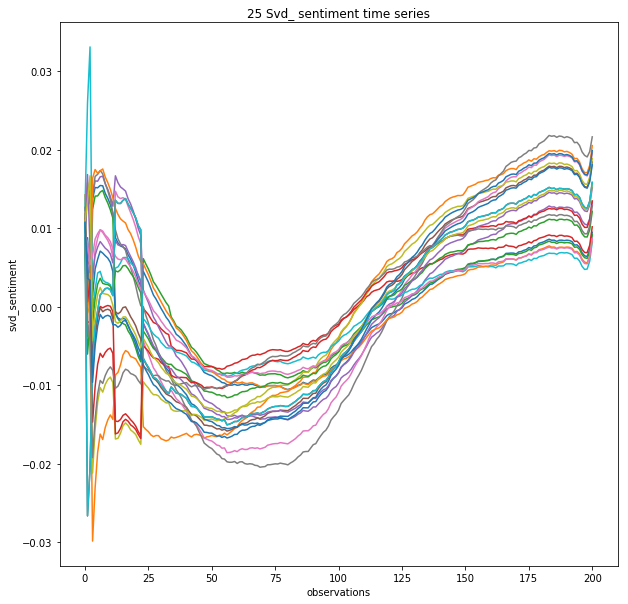

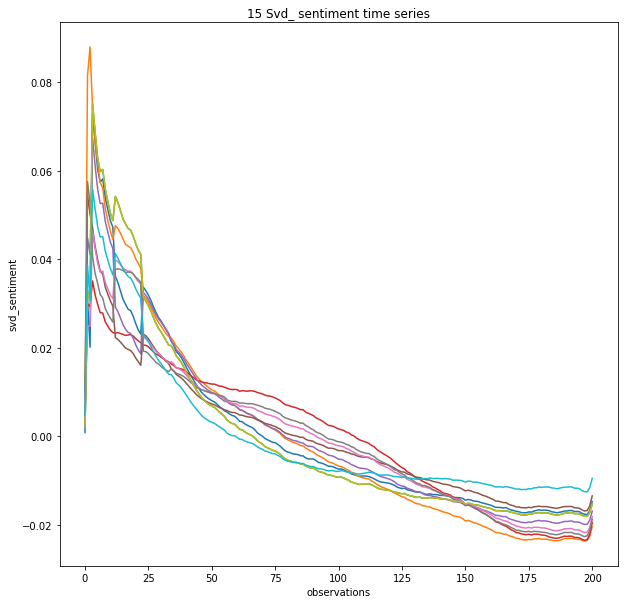

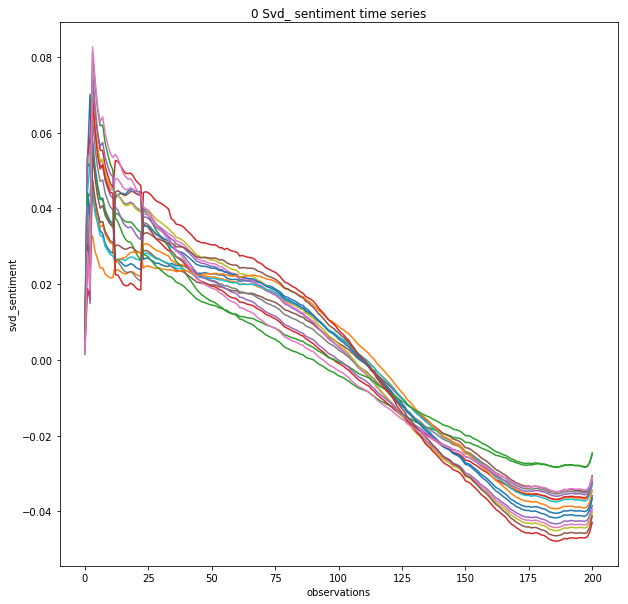

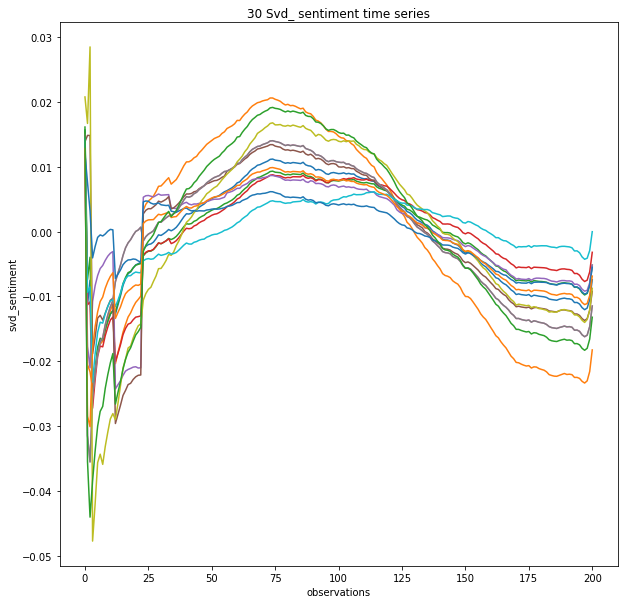

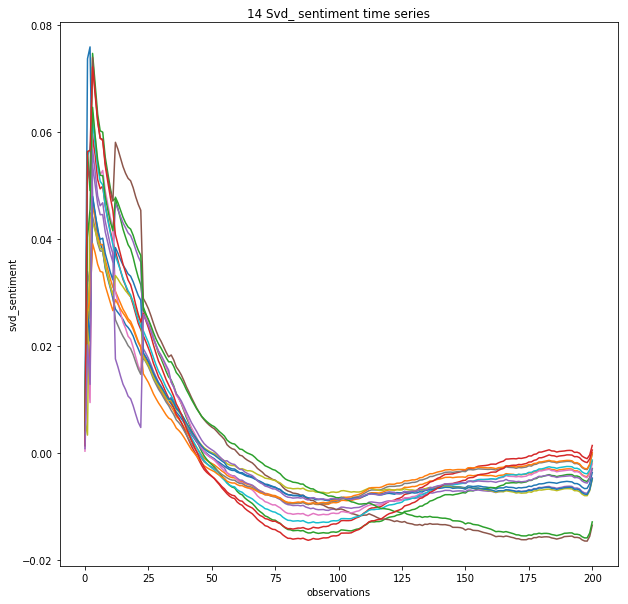

In [245]:
# book_test = rec_df_books['sentiments']
s_lsa, s_dtm_lsa = lsa_sentiment_vec(6,sentiments)
approx_vecs = pd.DataFrame(np.dot(s_dtm_lsa,s_lsa.components_))
cats = cluster_sentiment(100,approx_vecs)
all_ars = plot_book_svd(cats,approx_vecs)

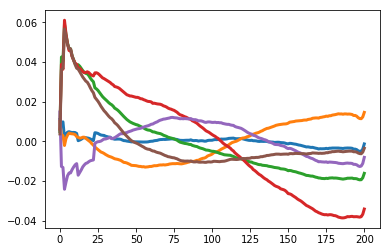

In [246]:
retest = plot_averages(cats,all_ars,'-',3)

In [57]:
rec_df_books = pd.DataFrame(dtm_lsa).copy()

In [210]:
rec_df_books['downloads'] = downloads
rec_df_books['adj_ratio'] = adj_ratio
rec_df_books['len_text'] = len_text
rec_df_books['subjects'] = len(subjects)
rec_df_books['sentiments'] = sentiments
rec_df_books['title'] = title

In [211]:
# rec_df_books.drop('title',inplace=True,axis =1)
rec_df_books.drop('sentiments',inplace=True,axis=1)

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.preprocessing import Normalizer

In [213]:
## Note we call a "fit_transform" here.  This does two things at once.
## First, it "fits" a transformation, so that the vectorizer.transform operation is defined.
## This transformation now means "count up the number of occurrences of these specific terms"
## Second, it applies that transformation to df_train.review and assigns the result to count_mat
vectorizer = CountVectorizer(min_df = 12, max_df=1000, stop_words = 'english')
count_mat = vectorizer.fit_transform(text_df.text)
#Display the matrix as a dataframe
pd.DataFrame(count_mat.toarray(),  columns=vectorizer.get_feature_names()).head(10)

,00,01,02,03,04,05,07,09,10,100,...,zone,zones,zoo,zoological,zoology,zouaves,zounds,zu,zulu,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,2,0,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,2,0,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,2,0,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
9,1,1,2,0,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [214]:
lsa = TruncatedSVD(50, algorithm = 'arpack')
reduced_mat = lsa.fit_transform(count_mat)

In [86]:
reduced_mat.shape

(1221, 50)

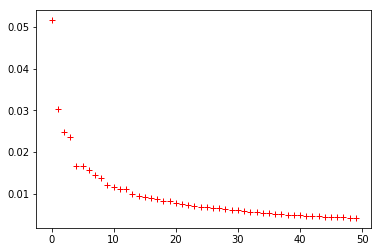

In [87]:
# This is (essentially) or eigenvalue plot (divided by the sum of eigenvalues).
plt.plot(lsa.explained_variance_ratio_,'r+')

In [88]:
## This just gives us the column names of our terms.
terms = np.array(vectorizer.get_feature_names())

In [89]:
terms

array(['00', '01', '02', ..., 'zu', 'zulu', 'zurich'], 
      dtype='<U72')

In [215]:
def get_topical_terms(topic_mat, topic_num, term_vec, num_terms=25):
    return term_vec[np.argsort(-topic_mat[topic_num,:])][:num_terms]

In [216]:
for i in range(10):
    print("topic {}".format(i))
    print(get_topical_terms(lsa.components_,i,terms, 35))

topic 0
['mrs' 'captain' 'lord' 'chapter' 'king' 'brother' 'john' 'tom' 'doctor'
 'jack' 'sea' 'uncle' 'boat' 'husband' 'gentleman' 'horse' 'ye' 'sister'
 'mary' 'ah' 'ship' 'boys' 'daughter' 'henry' 'harry' 'aunt' 'river' 'hall'
 'war' 'george' 'peter' 'girls' 'scarcely' 'colonel' 'london']
topic 1
['jack' 'captain' 'ye' 'king' 'boat' 'ship' 'ter' 'sea' 'henry' 'shore'
 'war' 'island' 'board' 'river' 'deck' 'shot' 'enemy' 'admiral' 'tom'
 'thou' 'charles' 'hit' 'ther' 'vessel' 'boats' 'camp' 'thet' 'crew' 'guns'
 'officer' 'officers' 'sail' 'fight' 'miles' 'lieutenant']
topic 2
['ye' 'ter' 'ther' 'thet' 'hit' 'bas' 'thornton' 'dorothy' 'hain' 'fer'
 'thar' 'parish' 'ef' 'yore' 'hyar' 'tree' 'hev' 'reckon' 'sim' 'goin'
 'war' 'kin' 'em' 'jest' 'peter' 'es' 'caleb' 'hump' 'afore' 'cal' 'mrs'
 'uncle' 'squires' 'thou' 'paused']
topic 3
['king' 'thou' 'lord' 'thy' 'thee' 'prince' 'harold' 'madame' 'roland'
 'earl' 'charles' 'duke' 'queen' 'monsieur' 'count' 'brother' 'william'
 'norman' '

In [92]:
sim_mat = np.dot(reduced_mat, reduced_mat.T)

In [93]:
sim_mat.shape

(1221, 1221)

In [94]:
def get_similar_docs(target_vec, corpus_vecs, num_res=5):
    sim_scores = np.dot(target_vec, corpus_vecs.T)
    idx = np.argsort(-sim_scores)[:num_res]
    ret_titles = [all_meta[i]['title'] for i in idx]
    return ret_titles

In [95]:
reduced_df = pd.DataFrame(reduced_mat)

In [148]:
rec_reduce_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,77.674946,-0.038581,0.023911,-0.032292,0.006708,0.023924,0.050187,0.033340,-0.017097,-0.011899,...,-5.683923,-3.241284,2.800635,0.094063,0.509052,-4.557184,3.849369,-6.599260,-11.587732,3.916950
1,79.348148,0.033676,0.037410,-0.075691,0.000740,-0.067696,-0.008124,-0.020202,-0.013868,0.000807,...,-7.596886,-17.923647,5.914048,6.179759,2.446158,10.314290,-3.608058,-1.603779,7.910321,2.022284
2,77.597376,0.082089,0.075646,-0.160262,-0.080122,-0.006729,0.026087,0.000256,0.003615,0.000540,...,-0.337340,2.969552,0.599533,-7.474302,2.004834,5.450777,1.116365,-1.044947,-1.504272,-1.601308
3,78.476038,0.228864,0.148856,-0.407251,-0.278383,0.032623,-0.079746,-0.049446,0.011709,-0.024152,...,3.067057,-13.036802,5.326085,2.352664,1.792609,0.898044,-11.839894,-4.083362,5.459089,-5.810338
4,79.598792,-0.609754,-0.856744,0.802068,0.081356,0.189945,0.144558,0.016850,0.053515,0.093760,...,-1.824212,-3.569074,1.025045,-0.489474,0.318529,0.918985,1.032308,-1.421566,-1.771347,1.214993


In [200]:
rec_reduce_df = pd.concat([sentiment_df,rec_df_books],axis =1)

In [201]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(rec_reduce_df))

In [206]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,216
0,-0.874663,-0.344060,-0.233160,-0.680667,-0.712620,-0.760149,-0.764027,-0.751171,-0.768994,-0.773759,...,0.291233,0.268289,-0.167696,-0.153241,0.072932,0.128600,-0.056905,-0.755986,-0.852409,0.0
1,0.549058,-0.061501,0.028373,-0.032101,0.001182,0.025572,0.048664,0.049445,0.064881,0.080620,...,-0.049452,-0.164151,-0.135666,0.009710,-0.132364,-0.183255,-0.211852,-0.351565,-0.941401,0.0
2,-1.401238,-0.449246,-0.327378,-0.908946,-0.965754,-1.047838,-1.069153,-1.046953,-1.069225,-1.086090,...,0.150426,0.001081,0.037778,0.006289,-0.078260,0.082436,0.158299,-2.139840,-1.019346,0.0
3,-1.011556,-0.372189,-0.258084,-0.745170,-0.793713,-0.872650,-0.897516,-0.879692,-0.892144,-0.906681,...,-0.467905,-0.400339,0.118080,-0.310386,-0.469538,-0.101060,-0.207548,1.493096,-0.865897,0.0
4,-0.468275,2.217565,1.405474,2.452646,2.135247,1.302626,1.372767,1.247016,1.568416,1.398731,...,0.842596,0.135103,0.532824,1.201813,-2.678625,-0.223214,0.098042,-0.867531,-1.118453,0.0


In [11]:
choose_book = 2
title = all_meta[choose_book]['title']

NameError: name 'all_meta' is not defined

In [205]:
print(title)
get_similar_docs(df.iloc[choose_book,:],df,12)

The King James Version of the Bible


['The Spell of the Yukon and Other Verses',
 None,
 'The Turmoil: A Novel',
 'Life of John Sterling',
 None,
 'A Lute of Jade : Selections from the Classical Poets of China',
 None,
 'History of the Decline and Fall of the Roman Empire — Volume 2',
 'The Kreutzer Sonata and Other Stories',
 'The Bobbsey Twins in the Country',
 'The King James Version of the Bible',
 'LandSat Picture of Washington, DC']